In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r"C:\Users\csvr\Downloads\TSLA_Stock.csv")

In [4]:
df.head()

,Unnamed: 0,Date,Close,High,Low,Open,Volume
0,2701,2021-03-23,220.720001,225.933334,219.169998,225.256668,91475700
1,2702,2021-03-24,210.089996,222.673340,210.036667,222.636673,101385600
2,2703,2021-03-25,213.463333,215.166672,203.166672,204.333328,117674700
3,2704,2021-03-26,206.236664,214.606674,199.963333,213.956665,101558400
4,2705,2021-03-29,203.763336,205.493332,198.673340,205.213333,85911000


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [6]:
df = df.drop(columns=['Unnamed: 0'])

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

In [7]:
df

,Date,Close,High,Low,Open,Volume
0,2021-03-23,220.720001,225.933334,219.169998,225.256668,91475700
1,2021-03-24,210.089996,222.673340,210.036667,222.636673,101385600
2,2021-03-25,213.463333,215.166672,203.166672,204.333328,117674700
3,2021-03-26,206.236664,214.606674,199.963333,213.956665,101558400
4,2021-03-29,203.763336,205.493332,198.673340,205.213333,85911000
...,...,...,...,...,...,...
249,2022-03-17,290.533325,291.666656,275.239990,276.996674,66582900
250,2022-03-18,301.796661,302.616669,289.130005,291.496674,100414200
251,2022-03-21,307.053345,314.283325,302.363342,304.993347,81981600
252,2022-03-22,331.326660,332.619995,307.250000,310.000000,105868500


In [8]:
df["return"] = df["Close"].pct_change()

df["vol_10"] = df["return"].rolling(10).std()
df["vol_20"] = df["return"].rolling(20).std()

df["price_range"] = (df["High"] - df["Low"]) / df["Close"]
df["volume_change"] = df["Volume"].pct_change()

df.head(10)

,Date,Close,High,Low,Open,Volume,return,vol_10,vol_20,price_range,volume_change
0,2021-03-23,220.720001,225.933334,219.169998,225.256668,91475700,NaN,NaN,NaN,0.030642,NaN
1,2021-03-24,210.089996,222.673340,210.036667,222.636673,101385600,-0.048161,NaN,NaN,0.060149,0.108334
2,2021-03-25,213.463333,215.166672,203.166672,204.333328,117674700,0.016057,NaN,NaN,0.056216,0.160665
3,2021-03-26,206.236664,214.606674,199.963333,213.956665,101558400,-0.033854,NaN,NaN,0.071003,-0.136956
4,2021-03-29,203.763336,205.493332,198.673340,205.213333,85911000,-0.011993,NaN,NaN,0.033470,-0.154073
5,2021-03-30,211.873337,212.553329,197.003326,200.583328,118297200,0.039801,NaN,NaN,0.073393,0.376974
6,2021-03-31,222.643326,224.000000,213.703339,215.539993,100011900,0.050832,NaN,NaN,0.046247,-0.154571
7,2021-04-01,220.583328,230.806671,219.806671,229.456665,105895200,-0.009252,NaN,NaN,0.049868,0.058826
8,2021-04-05,230.350006,236.053329,228.233337,235.903336,125528400,0.044277,NaN,NaN,0.033948,0.185402
9,2021-04-06,230.539993,232.183334,227.123337,230.100006,84815400,0.000825,NaN,NaN,0.021948,-0.324333


In [9]:
vol = df["vol_20"]

low_q = vol.quantile(0.33)
high_q = vol.quantile(0.66)

def assign_regime(v):
    if v <= low_q:
        return 0   # Low volatility
    elif v <= high_q:
        return 1   # Medium volatility
    else:
        return 2   # High volatility

df["volatility_regime"] = vol.apply(assign_regime)

In [10]:
df = df.dropna().reset_index(drop=True)

df.isna().sum()

Date                 0
Close                0
High                 0
Low                  0
Open                 0
Volume               0
return               0
vol_10               0
vol_20               0
price_range          0
volume_change        0
volatility_regime    0
dtype: int64

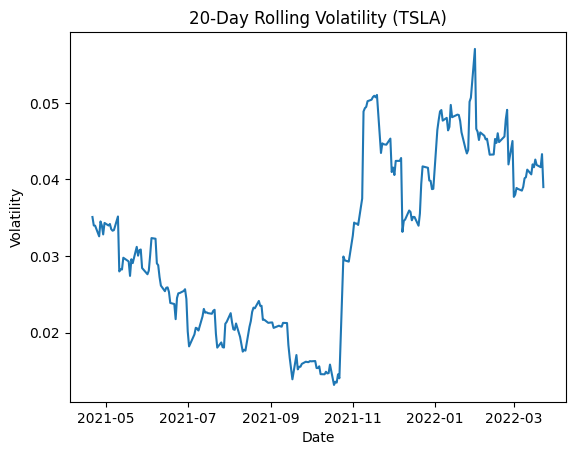

In [11]:
plt.figure()
plt.plot(df["Date"], df["vol_20"])
plt.title("20-Day Rolling Volatility (TSLA)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

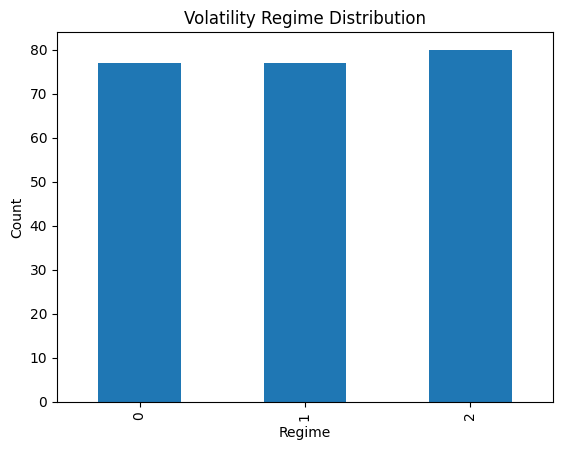

In [12]:
df["volatility_regime"].value_counts().sort_index().plot(kind="bar")
plt.title("Volatility Regime Distribution")
plt.xlabel("Regime")
plt.ylabel("Count")
plt.show()

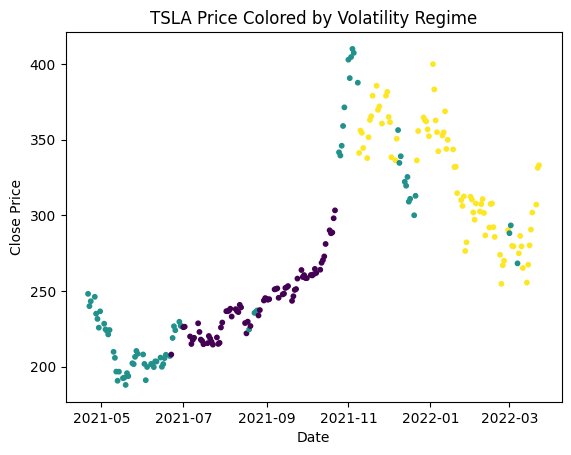

In [13]:
plt.figure()
plt.scatter(df["Date"], df["Close"], c=df["volatility_regime"], s=10)
plt.title("TSLA Price Colored by Volatility Regime")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [14]:
features = [
    "return",
    "vol_10",
    "vol_20",
    "price_range",
    "volume_change"
]

X = df[features]
y = df["volatility_regime"]

In [15]:
split_idx = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

pipeline_lr.fit(X_train, y_train)

y_pred_lr = pipeline_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.98      0.98      0.98        44

    accuracy                           0.96        47
   macro avg       0.82      0.82      0.82        47
weighted avg       0.96      0.96      0.96        47



In [18]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        random_state=42
    ))
])

pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.94      1.00      0.97        44

    accuracy                           0.94        47
   macro avg       0.47      0.50      0.48        47
weighted avg       0.88      0.94      0.91        47



C:\Users\csvr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\csvr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\csvr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classif

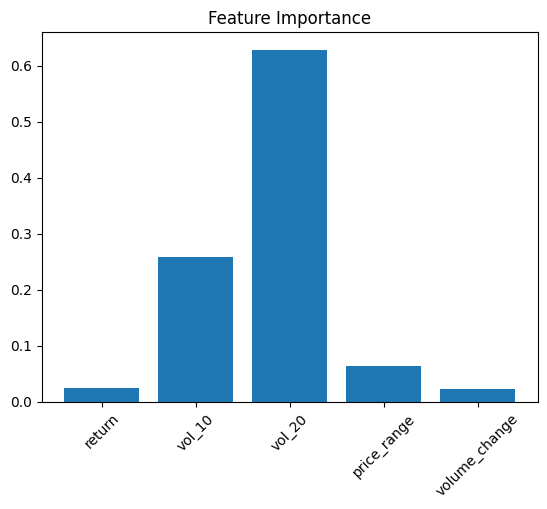

In [19]:
importances = pipeline_rf.named_steps["model"].feature_importances_

plt.figure()
plt.bar(features, importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()